This notebook explores the dataset.

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [17]:
from constants.directories import DATA_DIR, RESULTS_DIR
from helpers.utils import format_title

In [18]:
## Define constants
DATA_FILE = "2025-08-07-dataset.csv"

In [19]:
## Create dataframe
data_path = os.path.join(DATA_DIR, DATA_FILE)
df = pd.read_csv(data_path)

  Changed title from memento to Memento.
  Changed title from batman_begins to Batman Begins.
  Changed title from the_prestige to The Prestige.
  Changed title from the_dark_knight to The Dark Knight.
  Changed title from inception to Inception.
  Changed title from the_dark_knight_rises to The Dark Knight Rises.
  Changed title from interstellar to Interstellar.
  Changed title from dunkirk to Dunkirk.
  Changed title from tenet to Tenet.
  Changed title from oppenheimer to Oppenheimer.


/var/folders/bv/dbx16kzd5257m1tbr9t27bzc0000gn/T/ipykernel_8135/3014840613.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(df))  # or use 'hsv', 'Set3', etc.


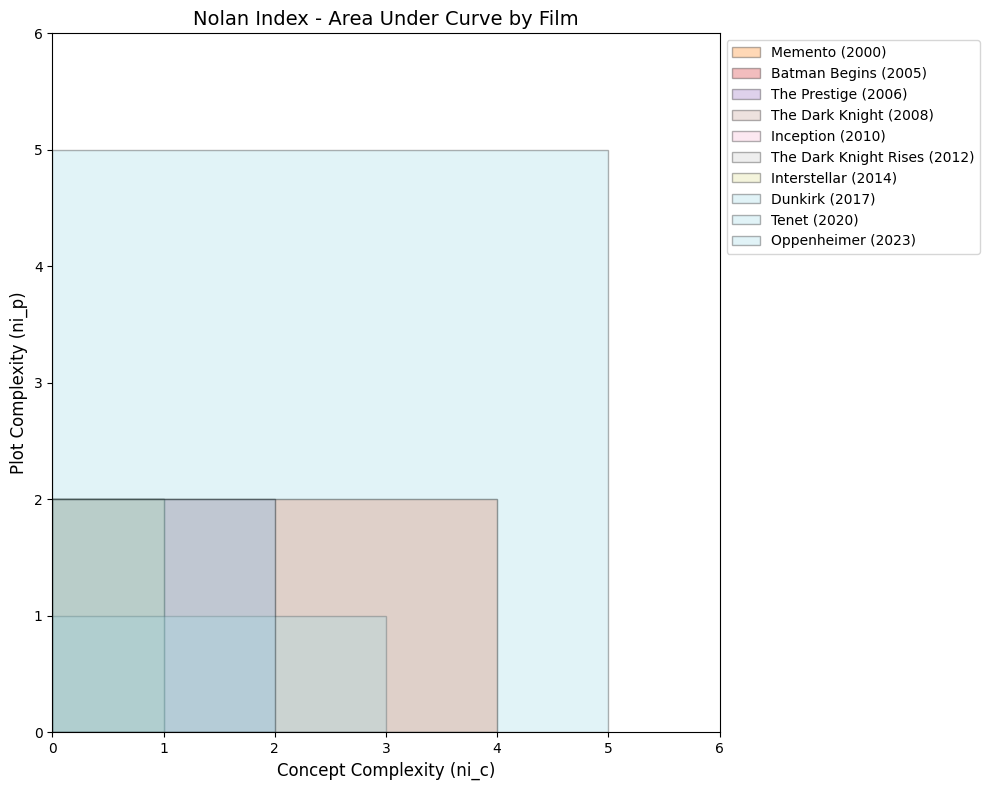

In [26]:
# Plot nolan index
fig, ax = plt.subplots(figsize=(10, 8))

df['ni_c'] = pd.to_numeric(df['ni_c'], errors='coerce')
df['ni_p'] = pd.to_numeric(df['ni_p'], errors='coerce')

df = df.dropna(subset=['ni_c', 'ni_p'])

colors = plt.cm.get_cmap('tab20', len(df))  # or use 'hsv', 'Set3', etc.

for i, row in df.iterrows():
    rect = patches.Rectangle(
        (0, 0),
        row['ni_c'],
        row['ni_p'],
        facecolor=colors(i),
        edgecolor='black',
        alpha=0.3,
        label=f"{format_title(row['title'])} ({row['year']})"
    )
    ax.add_patch(rect)

# Formatting
ax.set_xlim(0, df['ni_c'].max() + 1)
ax.set_ylim(0, df['ni_p'].max() + 1)
ax.set_xlabel("Concept Complexity (ni_c)", fontsize=12)
ax.set_ylabel("Plot Complexity (ni_p)", fontsize=12)
ax.set_title("Nolan Index - Area Under Curve by Film", fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
# ax.grid(True)

plt.tight_layout()
plt.show()